# Train an RNN to Write Songs Like Chris Martin  
  
### data source: https://www.kaggle.com/kpriyanshu256/coldplay-lyrics

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [25]:
data = open('coldplay_lyrics.txt').read()

corpus = data.lower().splitlines()
corpus = [n.replace(',','') for n in corpus if len(n) > 0]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [26]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 22, 100)           217300    
_________________________________________________________________
bidirectional (Bidirectional (None, 22, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 22, 300)           0         
_________________________________________________________________
unified_lstm_1 (UnifiedLSTM) (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1086)              109686    
_________________________________________________________________
dense_1 (Dense)              (None, 2173)              2362051   
Total params: 3,150,637
Trainable params: 3,150,637
Non-trainable params: 0
______________________________________________

Due to the size of the data, let's train for 10 epochs first.

In [28]:
history = model.fit(predictors, label, epochs=10, verbose=1)

Epoch 1/10
21145/21145 [==============================] - 68s 3ms/sample - loss: 5.4085 - accuracy: 0.0550
Epoch 2/10
21145/21145 [==============================] - 68s 3ms/sample - loss: 5.2599 - accuracy: 0.0654
Epoch 3/10
21145/21145 [==============================] - 68s 3ms/sample - loss: 5.1107 - accuracy: 0.0834
Epoch 4/10
21145/21145 [==============================] - 67s 3ms/sample - loss: 4.9714 - accuracy: 0.1052
Epoch 5/10
21145/21145 [==============================] - 68s 3ms/sample - loss: 4.8472 - accuracy: 0.1186
Epoch 6/10
21145/21145 [==============================] - 67s 3ms/sample - loss: 4.7423 - accuracy: 0.1342
Epoch 7/10
21145/21145 [==============================] - 66s 3ms/sample - loss: 4.6496 - accuracy: 0.1453
Epoch 8/10
21145/21145 [==============================] - 65s 3ms/sample - loss: 4.5656 - accuracy: 0.1591
Epoch 9/10
21145/21145 [==============================] - 65s 3ms/sample - loss: 4.5032 - accuracy: 0.1664
Epoch 10/10
21145/21145 [============

The accuracy is low, so let's keep training.

In [29]:
history = model.fit(predictors, label, epochs=20, verbose=1)

Epoch 1/20
21145/21145 [==============================] - 64s 3ms/sample - loss: 4.3568 - accuracy: 0.1846
Epoch 2/20
21145/21145 [==============================] - 65s 3ms/sample - loss: 4.2849 - accuracy: 0.1923
Epoch 3/20
21145/21145 [==============================] - 66s 3ms/sample - loss: 4.1985 - accuracy: 0.2044
Epoch 4/20
21145/21145 [==============================] - 66s 3ms/sample - loss: 4.1531 - accuracy: 0.2093
Epoch 5/20
21145/21145 [==============================] - 66s 3ms/sample - loss: 4.0634 - accuracy: 0.2207
Epoch 6/20
21145/21145 [==============================] - 66s 3ms/sample - loss: 3.9851 - accuracy: 0.2282
Epoch 7/20
21145/21145 [==============================] - 65s 3ms/sample - loss: 3.9098 - accuracy: 0.2393
Epoch 8/20
21145/21145 [==============================] - 65s 3ms/sample - loss: 3.8454 - accuracy: 0.2493
Epoch 9/20
21145/21145 [==============================] - 64s 3ms/sample - loss: 3.7759 - accuracy: 0.2598
Epoch 10/20
21145/21145 [============

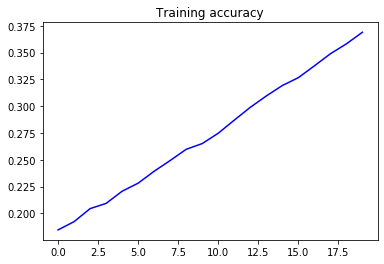

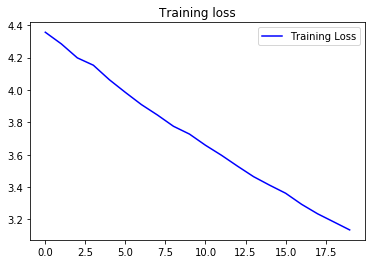

In [32]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

Let's try to use the famous song Yellow as a starter

In [33]:
seed_text = "look at the stars"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

look at the stars i could be worse there change the sun the world in the rain full of dreams is eye in waves when you know is stars hope one fall like stones stones stars one stars light it right to see you close your side saying when message home and i wanted to go and i know what you let you down it right for you down and i know i know i don't understand light i don't understand have this place and i light for you come back into the sun comes down it out for you on my heart with


Syntax and grammar are not great, but we do see some interesting phrases thanks to word embeddings. "The world in the rain", "full of freams", "fall like stones".

In [34]:
seed_text = "nobody said it was easy"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

nobody said it was easy to be saved to keep it away from me drink from me there by the bubble side army of sound sound you don't start no oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh


This one is fun. Easy song!

Now, instead of feeding a whole line, we can give it a word and let it run with it.

In [35]:
seed_text = "you"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

you don't know what it feels like the sun and flow my head starts to ring fix you down to me and i know and i know what you ever go out for princess light it where do you go was to be lonely like a beautiful world i could be a whisper a whisper a whisper a whisper a whisper a whisper a whisper a whisper a whisper a whisper a whisper a whisper a whisper a whisper a whisper a whisper a whisper a whisper a whisper a whisper a whisper a whisper a whisper a whisper a whisper


In [36]:
seed_text = "love"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

love you let me go to be patient for me a beautiful world i could be saved to see you down into blood to start light light it start through you down me again it upon me died are cold side where the world a bubble became coat in waves ah ah oh oh light you love me start rush la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la
